## Simple linear regression

In [1]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## create dataset

In [3]:
path = kagglehub.dataset_download("debajyotipodder/co2-emission-by-vehicles") # download dataset from https://www.kaggle.com/ .

df = pd.read_csv(path + r"\CO2 Emissions_Canada.csv")
df.head()

100%|██████████| 88.3k/88.3k [00:00<00:00, 674kB/s]

Extracting files...


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## 1- Emissions analysis with engine size feature

### a. preprocessing

In [6]:
cdf_1 = df[['Engine Size(L)', 'CO2 Emissions(g/km)']] # We separate the two desired columns from the table.

cdf_1['Engine Size(L)'].describe()

count    7385.000000
mean        3.160068
std         1.354170
min         0.900000
25%         2.000000
50%         3.000000
75%         3.700000
max         8.400000
Name: Engine Size(L), dtype: float64

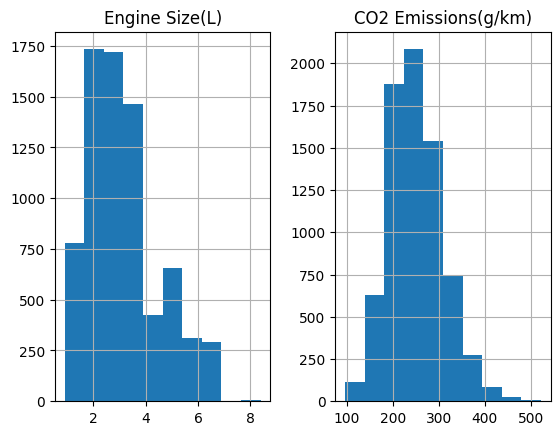

In [7]:
vis_1 = cdf_1[['Engine Size(L)', 'CO2 Emissions(g/km)']]
vis_1.hist()
plt.show()

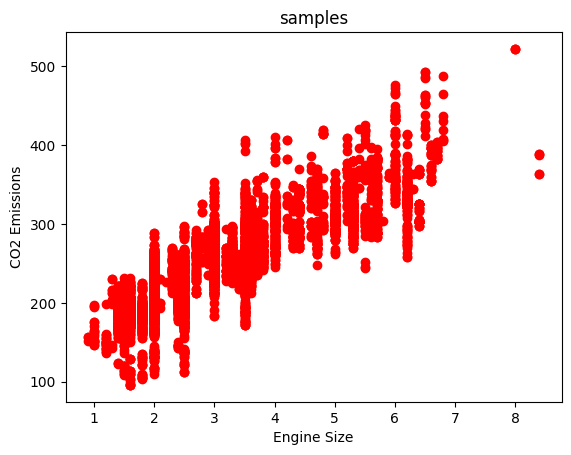

In [8]:
plt.scatter(cdf_1['Engine Size(L)'], cdf_1['CO2 Emissions(g/km)'], c='r')
plt.title('samples')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8 # split train and test data.

train_1 = cdf_1[msk]
test_1 = cdf_1[~msk]

train_1.shape, test_1.shape

((5929, 2), (1456, 2))

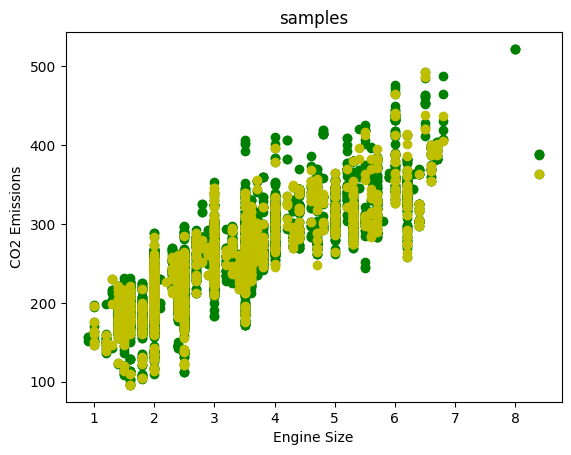

In [10]:
plt.scatter(train_1['Engine Size(L)'], train_1['CO2 Emissions(g/km)'], c='g') # to visualize train and test_1 samples. 
plt.scatter(test_1['Engine Size(L)'], test_1['CO2 Emissions(g/km)'], c='y')
plt.title('samples')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### b. model definition

In [11]:
model_1 = LinearRegression()

x_train_1 = np.asanyarray(train_1[['Engine Size(L)']])
y_train_1 = np.asanyarray(train_1[['CO2 Emissions(g/km)']])

model_1.fit(x_train_1, y_train_1)

print(model_1.coef_, model_1.intercept_)

[[37.00686075]] [133.67494279]


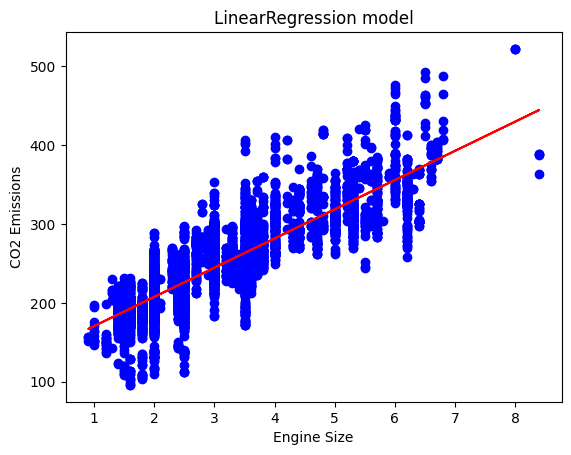

In [12]:
plt.scatter(x_train_1, y_train_1, c='b')
plt.plot(x_train_1, model_1.coef_[0][0] * x_train_1 + model_1.intercept_[0], c='r')
plt.title('LinearRegression model')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### c. evaluating

In [13]:
x_test_1 = np.asanyarray(test_1[['Engine Size(L)']])
y_test_1 = np.asanyarray(test_1[['CO2 Emissions(g/km)']])

y_pred_1 = model_1.predict(x_test_1)

In [14]:
MAE_1 = np.mean(np.absolute(y_test_1 - y_pred_1)) # Mean Absolute Error
MSE_1 = np.mean((y_test_1 - y_pred_1) ** 2) # Mean Squared Error
R2E_1 = r2_score(y_test_1, y_pred_1) # R2 Error

print(f"Mean Absolute Error : {MAE_1} | Mean Squared Error : {MSE_1} | R2 Error : {R2E_1}")

Mean Absolute Error : 23.6993393872141 | Mean Squared Error : 973.9646588415154 | R2 Error : 0.7176218178062252


## 2- Emissions analysis with Cylinders feature

### a. preprocessing

In [15]:
cdf_2 = df[['Cylinders', 'CO2 Emissions(g/km)']]

cdf_2['Cylinders'].describe()

count    7385.000000
mean        5.615030
std         1.828307
min         3.000000
25%         4.000000
50%         6.000000
75%         6.000000
max        16.000000
Name: Cylinders, dtype: float64

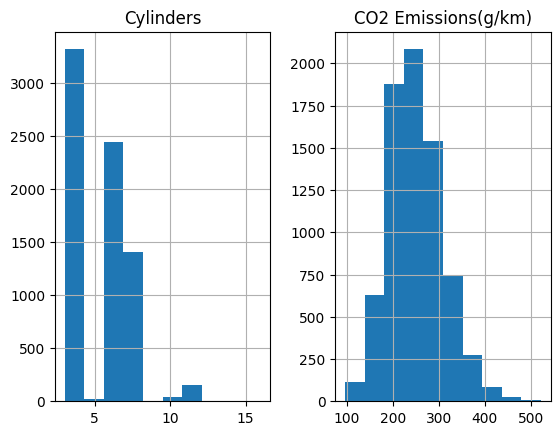

In [16]:
vis_2 = cdf_2[['Cylinders', 'CO2 Emissions(g/km)']]
vis_2.hist()
plt.show()

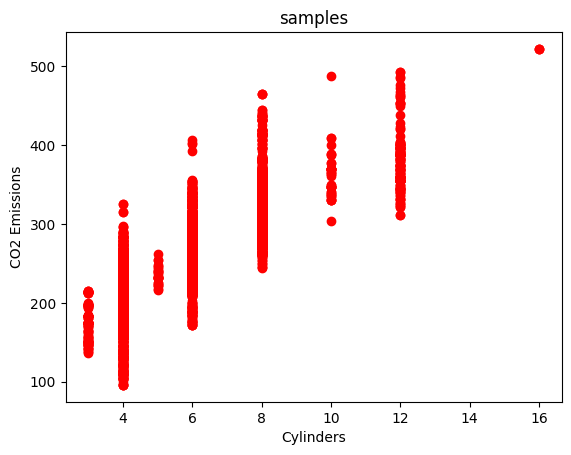

In [17]:
plt.scatter(cdf_2.Cylinders, cdf_2['CO2 Emissions(g/km)'], c='r')
plt.title('samples')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

In [18]:
train_2 = cdf_2[msk] # We use the previous msk boolean array.
test_2 = cdf_2[~msk]

train_2.shape, test_2.shape

((5929, 2), (1456, 2))

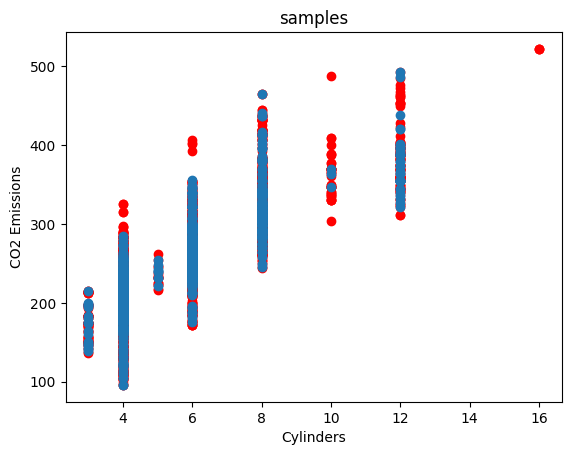

In [19]:
plt.scatter(train_2['Cylinders'], train_2['CO2 Emissions(g/km)'], c='r')
plt.scatter(test_2['Cylinders'], test_2['CO2 Emissions(g/km)'])
plt.title('samples')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

### b. model definition

In [20]:
model_2 = LinearRegression()

x_train_2 = np.asanyarray(train_2[['Cylinders']])
y_train_2 = np.asanyarray(train_2[['CO2 Emissions(g/km)']])

model_2.fit(x_train_2, y_train_2)

print(model_2.coef_, model_2.intercept_)

[[26.76585592]] [100.40813741]


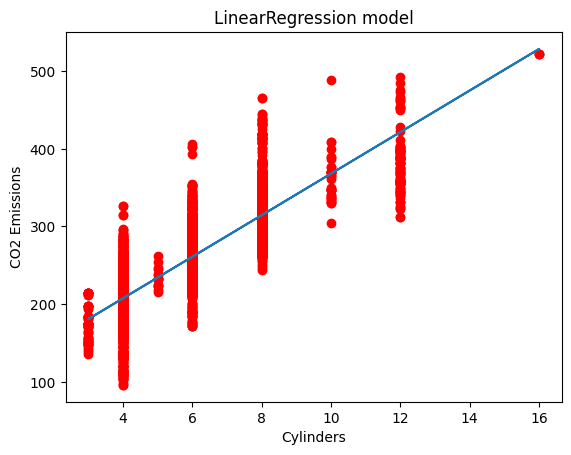

In [21]:
plt.scatter(x_train_2, y_train_2, c='r')
plt.plot(x_train_2, model_2.coef_ * x_train_2 + model_2.intercept_)
plt.title('LinearRegression model')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

### c. evaluating

In [22]:
x_test_2 = np.asanyarray(test_2[['Cylinders']])
y_test_2 = np.asanyarray(test_2[['CO2 Emissions(g/km)']])

y_pred_2 = model_2.predict(x_test_2)

In [23]:
MAE_2 = np.mean(np.absolute(y_test_2 - y_pred_2))
MSE_2 = np.mean((y_test_2 - y_pred_2) ** 2)
R2E_2 = r2_score(y_test_2, y_pred_2)

print(f"Mean Absolute Error : {MAE_2} | Mean Squared Error : {MSE_2} | R2 Error : {R2E_2}")

Mean Absolute Error : 24.526328926717476 | Mean Squared Error : 1060.0338784895791 | R2 Error : 0.6926680686466147


## 3- Emissions analysis with Fuel Consumption City feature

### a. preprocessing

In [24]:
cdf_3 = df[['Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)']]

cdf_3['Fuel Consumption City (L/100 km)'].describe()

count    7385.000000
mean       12.556534
std         3.500274
min         4.200000
25%        10.100000
50%        12.100000
75%        14.600000
max        30.600000
Name: Fuel Consumption City (L/100 km), dtype: float64

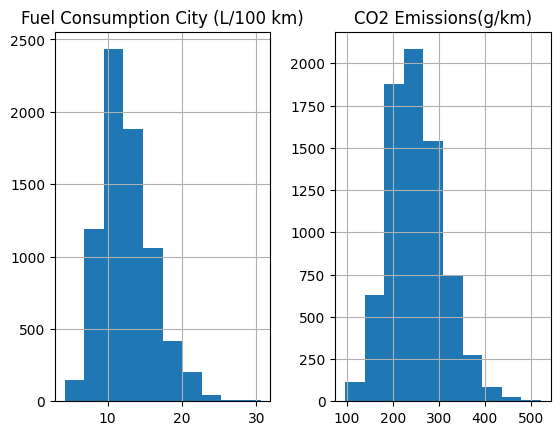

In [25]:
vis_3 = cdf_3[['Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)']]
vis_3.hist()
plt.show()

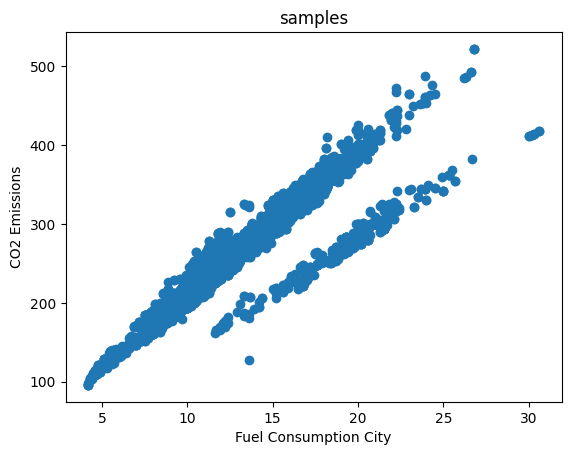

In [26]:
plt.scatter(cdf_3['Fuel Consumption City (L/100 km)'], cdf_3['CO2 Emissions(g/km)'])
plt.title('samples')
plt.xlabel('Fuel Consumption City')
plt.ylabel('CO2 Emissions')
plt.show()

In [27]:
train_3 = cdf_3[msk]
test_3 = cdf_3[~msk]

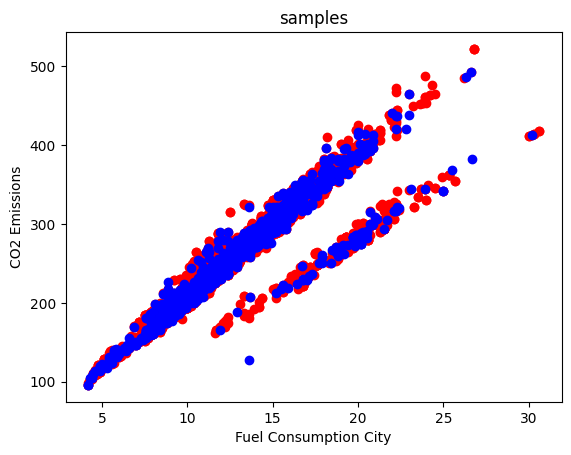

In [28]:
plt.scatter(train_3['Fuel Consumption City (L/100 km)'], train_3['CO2 Emissions(g/km)'], c='r')
plt.scatter(test_3['Fuel Consumption City (L/100 km)'], test_3['CO2 Emissions(g/km)'], c='b')
plt.title('samples')
plt.xlabel('Fuel Consumption City')
plt.ylabel('CO2 Emissions')
plt.show()

### b. model definition

In [29]:
model_3 = LinearRegression()

x_train_3 = np.asanyarray(test_3[['Fuel Consumption City (L/100 km)']])
y_train_3 = np.asanyarray(test_3[['CO2 Emissions(g/km)']])

model_3.fit(x_train_3, y_train_3)

print(model_3.coef_, model_3.intercept_)

[[15.40016788]] [57.01215048]


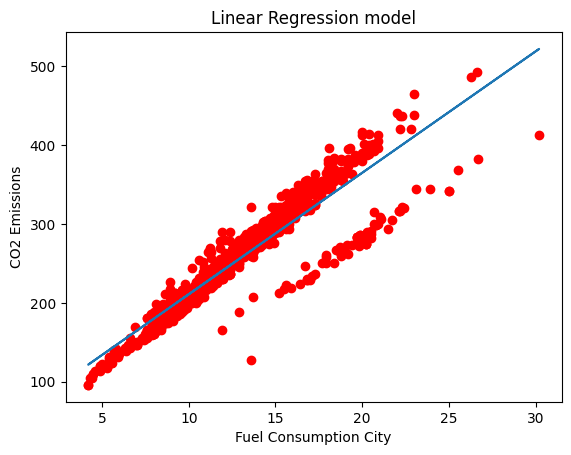

In [30]:
plt.scatter(x_train_3, y_train_3, c='r')
plt.plot(x_train_3, model_3.coef_ * x_train_3 + model_3.intercept_) # y = mx + b
plt.title('Linear Regression model')
plt.xlabel('Fuel Consumption City')
plt.ylabel('CO2 Emissions')
plt.show()

### c. evaluating

In [31]:
x_test_3 = np.asanyarray(test_3[['Fuel Consumption City (L/100 km)']])
y_test_3 = np.asanyarray(test_3[['CO2 Emissions(g/km)']])

y_pred_3 = model_3.predict(x_test_3)

In [32]:
MAE_3 = np.mean(np.absolute(y_test_3 - y_pred_3))
MSE_3 = np.mean((y_test_3 - y_pred_3) ** 2)
R2E_3 = r2_score(y_test_3, y_pred_3)

print(f"Mean Absolute Error : {MAE_3} | Mean Squared Error : {MSE_3} | R2 Error : {R2E_3}")

Mean Absolute Error : 14.013989790084247 | Mean Squared Error : 520.0755606401897 | R2 Error : 0.8492163036062668


## 4. Emissions analysis with Fuel Consumption Highway feature

### a. preprocessing

In [34]:
cdf_4 = df[['Fuel Consumption Hwy (L/100 km)', 'CO2 Emissions(g/km)']]

cdf_4['Fuel Consumption Hwy (L/100 km)'].describe()

count    7385.000000
mean        9.041706
std         2.224456
min         4.000000
25%         7.500000
50%         8.700000
75%        10.200000
max        20.600000
Name: Fuel Consumption Hwy (L/100 km), dtype: float64

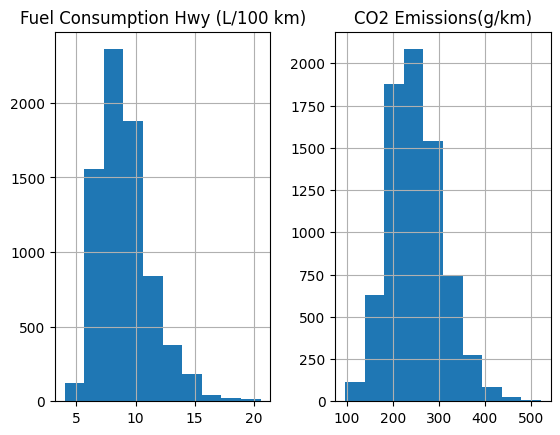

In [35]:
vis_4 = cdf_4[['Fuel Consumption Hwy (L/100 km)', 'CO2 Emissions(g/km)']]
vis_4.hist()
plt.show()

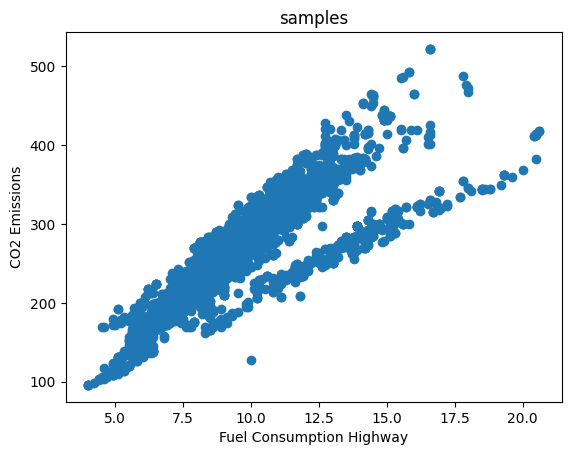

In [36]:
plt.scatter(cdf_4['Fuel Consumption Hwy (L/100 km)'], cdf_4['CO2 Emissions(g/km)'])
plt.title("samples")
plt.xlabel('Fuel Consumption Highway')
plt.ylabel('CO2 Emissions')
plt.show()

In [37]:
train_4 = cdf_4[msk]
test_4 = cdf_4[~msk]

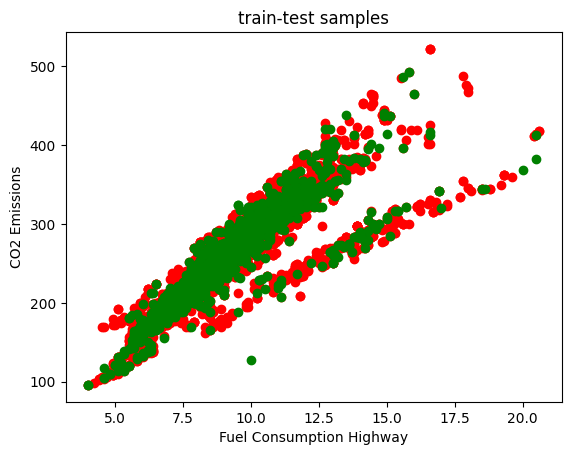

In [39]:
plt.scatter(train_4['Fuel Consumption Hwy (L/100 km)'], train_4['CO2 Emissions(g/km)'], c='r')
plt.scatter(test_4['Fuel Consumption Hwy (L/100 km)'], test_4['CO2 Emissions(g/km)'], c='g')
plt.title("train-test samples")
plt.xlabel('Fuel Consumption Highway')
plt.ylabel('CO2 Emissions')
plt.show()

### b. model definition

In [40]:
model_4 = LinearRegression()

x_train_4 = np.asanyarray(train_4[['Fuel Consumption Hwy (L/100 km)']])
y_train_4 = np.asanyarray(train_4[['CO2 Emissions(g/km)']])

model_4.fit(x_train_4, y_train_4)

print(model_4.coef_, model_4.intercept_)

[[23.17023337]] [41.12874043]


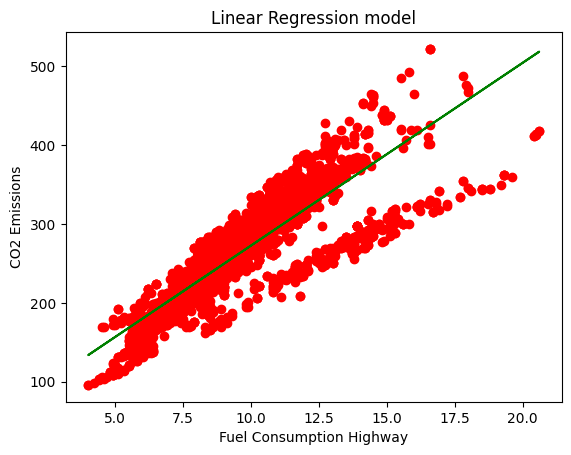

In [42]:
plt.scatter(x_train_4, y_train_4, c='r')
plt.plot(x_train_4, model_4.coef_ * x_train_4 + model_4.intercept_, c='g')
plt.title("Linear Regression model")
plt.xlabel('Fuel Consumption Highway')
plt.ylabel('CO2 Emissions')
plt.show()

### c. evaluation

In [43]:
x_test_4 = np.asanyarray(test_4[['Fuel Consumption Hwy (L/100 km)']])
y_test_4 = np.asanyarray(test_4[['CO2 Emissions(g/km)']])

y_pred_4 = model_4.predict(x_test_4)

In [44]:
MAE_4 = np.mean(np.absolute(y_test_4 - y_pred_4))
MSE_4 = np.mean((y_test_4 - y_pred_4) ** 2)
R2E_4 = r2_score(y_test_4, y_pred_4)

print(f"Mean Absolute Error : {MAE_4} | Mean Squared Error : {MSE_4} | R2 Error : {R2E_4}")

Mean Absolute Error : 18.222877068143088 | Mean Squared Error : 739.2337032158362 | R2 Error : 0.7856765464377828


## 5. Emissions analysis with Fuel Consumption Combined feature

### a. peprocessing

In [47]:
cdf_5 = df[['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]

print(cdf_5.head())
print(f"mean of fuel consumption combine : {cdf_5['Fuel Consumption Comb (L/100 km)'].mean()}")

   Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)
0                               8.5                  196
1                               9.6                  221
2                               5.9                  136
3                              11.1                  255
4                              10.6                  244
mean of fuel consumption combine : 10.975071090047393


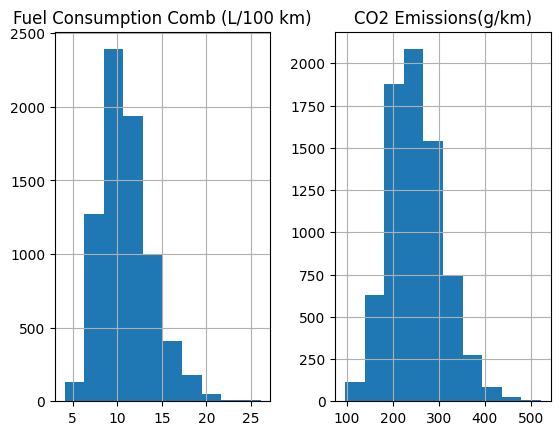

In [48]:
vis_5 = cdf_5[['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]
vis_5.hist()
plt.show()

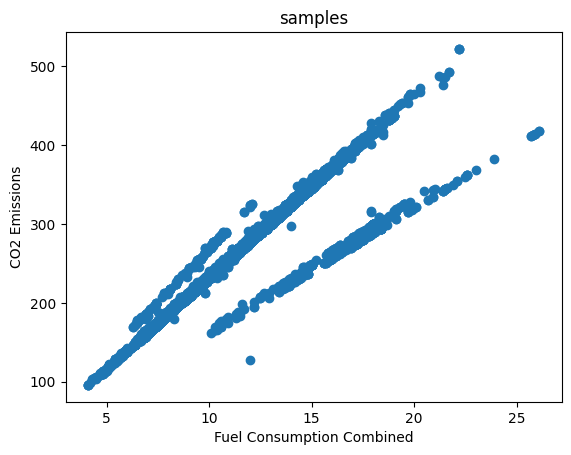

In [49]:
plt.scatter(cdf_5['Fuel Consumption Comb (L/100 km)'], cdf_5['CO2 Emissions(g/km)'])
plt.title("samples")
plt.xlabel("Fuel Consumption Combined")
plt.ylabel("CO2 Emissions")
plt.show()

In [51]:
train_5, test_5 = cdf_5[msk], cdf_5[~msk]

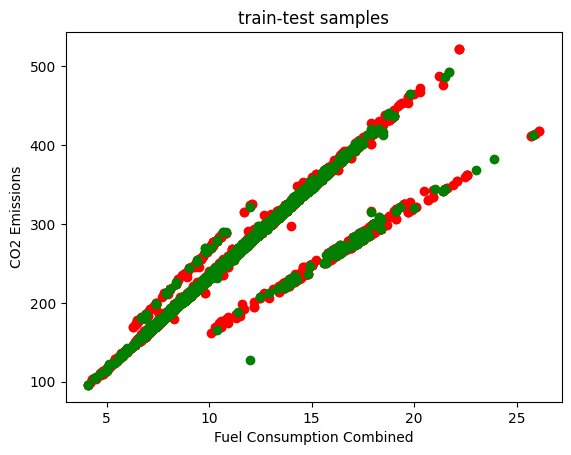

In [53]:
plt.scatter(train_5['Fuel Consumption Comb (L/100 km)'], train_5['CO2 Emissions(g/km)'], c='r')
plt.scatter(test_5['Fuel Consumption Comb (L/100 km)'], test_5['CO2 Emissions(g/km)'], c='g')
plt.title("train-test samples")
plt.xlabel("Fuel Consumption Combined")
plt.ylabel("CO2 Emissions")
plt.show()

### b. model definition

In [54]:
model_5 = LinearRegression()

x_train_5 = np.asanyarray(train_5[['Fuel Consumption Comb (L/100 km)']])
y_train_5 = np.asanyarray(train_5[['CO2 Emissions(g/km)']])

model_5.fit(x_train_5, y_train_5)

print(model_5.coef_, model_5.intercept_)

[[18.54490208]] [47.10095921]


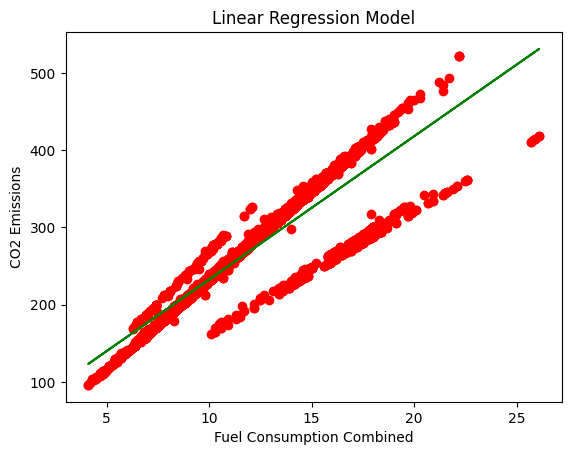

In [56]:
plt.scatter(x_train_5, y_train_5, c='r')
plt.plot(x_train_5, model_5.coef_ * x_train_5 + model_5.intercept_, c='g')
plt.title("linear regression model".title())
plt.xlabel("Fuel Consumption Combined")
plt.ylabel("CO2 Emissions")
plt.show()

### c. evaluation

In [58]:
x_test_5 = np.asanyarray(test_5[['Fuel Consumption Comb (L/100 km)']])
y_test_5 = np.asanyarray(test_5[['CO2 Emissions(g/km)']])

y_pred_5 = model_5.predict(x_test_5)

In [59]:
MAE_5 = np.mean(np.absolute(y_test_5 - y_pred_5))
MSE_5 = np.mean((y_test_5 - y_pred_5) ** 2)
R2E_5 = r2_score(y_test_5, y_pred_5)

print(f"Mean Absolute Error : {MAE_5} | Mean Squared Error : {MSE_5} | R2 Error : {R2E_5}")

Mean Absolute Error : 13.837565228691137 | Mean Squared Error : 527.4538034808066 | R2 Error : 0.8470771553505222
